In [1]:
from env import DATABASE_URI
from sqlalchemy import create_engine, text, select, and_
from sqlalchemy.orm import Session, scoped_session, sessionmaker
from data_models import Data, Run, Module
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import csv
from datetime import datetime

sensors = ['E4', 'E4']
run_id = 12

engine = create_engine(DATABASE_URI)
Session = scoped_session(sessionmaker(bind=engine))
session = Session()

def sensor_csv(session, run_id, sensor):
    query = select(Data).where(Data.run_id == run_id)
    data = session.execute(query).scalars().all()
    with open(f"/home/hayden/repos/module_pcb_thermal_mockup/module_pcb_thermal_mockup_v4.5/software/run_{run_id}_{sensor}.csv", mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Time", sensor])
        for row in data:
            if row.sensor == sensor:
                writer.writerow([row.timestamp.isoformat(), row.celcius])

for sensor in sensors:
    sensor_csv(session, run_id, sensor)

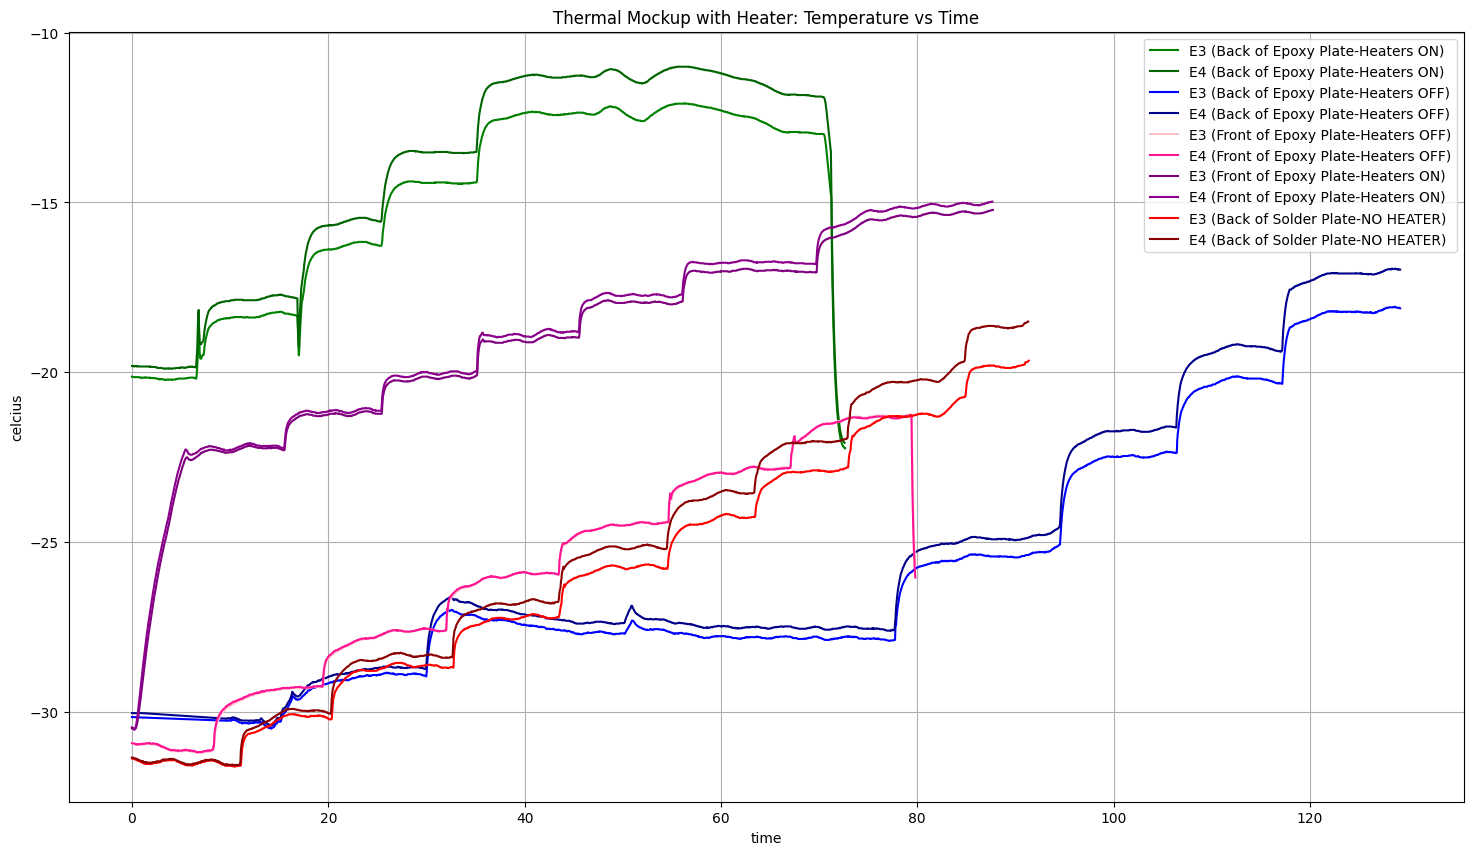

In [17]:
engine = create_engine(DATABASE_URI)
Session = scoped_session(sessionmaker(bind=engine))
session = Session()

lbl_colors = {
    'E3': 'blue',
    'E4': 'red'
}

fig, ax = plt.subplots(figsize=(18,10))

def get_sensor_data(session, run_id, sensor, cut_in=0):
    query = select(Data).where(and_(Data.run_id == run_id, Data.sensor == sensor))
    data = session.execute(query).scalars().all()

    t0 = data[cut_in].timestamp
    elapsed_time = lambda t: (t - t0).total_seconds() / 60 

    times = [elapsed_time(row.timestamp) for row in data]
    temps = [row.celcius for row in data]
    return times[cut_in:], temps[cut_in:]

e3_times_3, e3_temps_3 = get_sensor_data(session, 3, 'E3')
e4_times_3, e4_temps_3 = get_sensor_data(session, 3, 'E4')

e3_times_4, e3_temps_4 = get_sensor_data(session, 4, 'E3')
e4_times_4, e4_temps_4 = get_sensor_data(session, 4, 'E4')

e3_times_7, e3_temps_7 = get_sensor_data(session, 7, 'E3')
e4_times_7, e4_temps_7 = get_sensor_data(session, 7, 'E4')

e3_times_8, e3_temps_8 = get_sensor_data(session, 8, 'E3')
e4_times_8, e4_temps_8 = get_sensor_data(session, 8, 'E4')

e3_times_12, e3_temps_12 = get_sensor_data(session, 12, 'E3', cut_in=600)
e4_times_12, e4_temps_12 = get_sensor_data(session, 12, 'E4', cut_in=600)

# ax.plot(e3_times_3, e3_temps_3, label='E3 (Back of Epoxy Plate-Heaters ON)', color='green')
# ax.plot(e4_times_3, e4_temps_3, label='E4 (Back of Epoxy Plate-Heaters ON)', color='darkgreen')

ax.plot(e3_times_4, e3_temps_4, label='E3 (Back of Epoxy Plate-Heaters OFF)', color='blue')
ax.plot(e4_times_4, e4_temps_4, label='E4 (Back of Epoxy Plate-Heaters OFF)', color='darkblue')

# ax.plot(e3_times_7, e3_temps_7, label='E3 (Front of Epoxy Plate-Heaters OFF)', color='pink')
# ax.plot(e4_times_7, e4_temps_7, label='E4 (Front of Epoxy Plate-Heaters OFF)', color='deeppink')

# ax.plot(e3_times_8, e3_temps_8, label='E3 (Front of Epoxy Plate-Heaters ON)', color='purple')
# ax.plot(e4_times_8, e4_temps_8, label='E4 (Front of Epoxy Plate-Heaters ON)', color='darkmagenta')

ax.plot(e3_times_12, e3_temps_12, label='E3 (Back of Solder Plate-NO HEATER)', color='red')
ax.plot(e4_times_12, e4_temps_12, label='E4 (Back of Solder Plate-NO HEATER)', color='darkred')




# ax.plot(e3_times_7, e3_temps_7, label='E3_7_epoxy', color='green')
# ax.plot(e4_times_7, e4_temps_7, label='E4_7_epoxy', color='darkgreen')
# ax.plot(e3_times_8, e3_temps_8, label='E3_8_epoxy', color='black')
# ax.plot(e4_times_8, e4_temps_8, label='E4_8_epoxy', color='black')
# ax.axvline(x = elapsed_time(datetime(2024,8,16,9,53)), color = 'black', label = '1 W', linestyle='--')
# ax.axvline(x = elapsed_time(datetime(2024,8,16,10,41)), color = 'black', label = '2 W', linestyle='--')
# ax.axvline(x = elapsed_time(datetime(2024,8,16,10,57)), color = 'black', label = '3 W', linestyle='--')
# ax.axvline(x = elapsed_time(datetime(2024,8,16,11,10)), color = 'black', label = '4 W', linestyle='--')
# ax.axvline(x = elapsed_time(datetime(2024,8,16,11,21)), color = 'black', label = '5 W', linestyle='--')

ax.set(
    xlabel='time',
    ylabel='celcius',
    title = 'Thermal Mockup with Heater: Temperature vs Time'
)

ax.legend()
ax.grid()
